In [1]:
import yfinance
!pip install --upgrade yfinance

In [2]:
kyokuyoClass = yfinance.Ticker("1301.T")

## yfinance.infoの中身を確認する

In [81]:
h = 0
for i in kyokuyoClass.info:
  print(f"{i}    :  {kyokuyoClass.info[i]}")
  h += 1
  if h == 20:
    break

address1    :  Sumitomo Seimei Sanno Building
address2    :  3-3-5, chome, Akasaka Minato-Ku
city    :  Tokyo
zip    :  107-0052
country    :  Japan
phone    :  81 3 5545 0701
fax    :  81 3 5545 0751
website    :  https://www.kyokuyo.co.jp
industry    :  Packaged Foods
industryDisp    :  Packaged Foods
sector    :  Consumer Defensive
longBusinessSummary    :  Kyokuyo Co., Ltd. purchases, sells, imports, and exports marine products in Japan and internationally. The company operates through Marine Products Purchasing, Foods, Logistics, and Tuna segments. It provides fish fillets, crabs, and peeled shrimps. The company also offers sushi toppings to restaurant chains; simmered and grilled fish; fried seafood products; imitation crab meat; and fish fillets; bonitos; and frozen and chilled foods. In addition, it involved in the purchasing and sale of fisheries, agricultural, and meat products; aquaculture, processing, and sale of tuna, skipjack, salt cured salmon, sashimi, fish flakes, live

### TOPIX採用銘柄データの取得

In [23]:
import urllib.request
import pandas as pd
urllib.request.urlretrieve("https://www.jpx.co.jp/markets/indices/topix/tvdivq00000030ne-att/topixweight_j.csv", "topixweight_j.csv")
df = pd.read_csv("topixweight_j.csv", encoding = "shift-jis")

### Yahoo Finance用に銘柄コードを一括編集

In [24]:
df = df.dropna(subset = ["コード"])
df["コード"] = df["コード"].astype(int).astype(str)
df

,日付,銘柄名,コード,業種,TOPIXに占める個別銘柄のウエイト,ニューインデックス区分
0,20230531,極洋,1301,水産・農林業,0.0062%,TOPIX Small 2
1,20230531,ニッスイ,1332,水産・農林業,0.0288%,TOPIX Mid400
2,20230531,マルハニチロ,1333,水産・農林業,0.0167%,TOPIX Mid400
3,20230531,雪国まいたけ,1375,水産・農林業,0.0037%,TOPIX Small 2
4,20230531,カネコ種苗,1376,水産・農林業,0.0020%,TOPIX Small 2
...,...,...,...,...,...,...
2152,20230531,ジェコス,9991,卸売業,0.0017%,TOPIX Small 2
2153,20230531,ヤマザワ,9993,小売業,0.0006%,TOPIX Small 2
2154,20230531,やまや,9994,小売業,0.0014%,TOPIX Small 2
2155,20230531,グローセル,9995,卸売業,0.0013%,TOPIX Small 2


In [ ]:
scod_list = df["コード"].to_list()
scod_list = [i + ".T" for i in scod_list] #yahoo finance 用Tickerに変換

#dict型に企業オブジェクトの挿入
obj_dict = {}

# for scod in scod_list[:1000]:
for scod in scod_list:
  try:
    o = yfinance.Ticker(scod)
    obj_dict[scod] = o
  except:
    print(f"exception occured in scod {scod}")

## 例）RORとPBRを取得する例

In [61]:

# テスト　取得した企業の財務データを取得
f_list = []
f_list_header = ["returnOnEquity", "priceToBook"] # これはメモ
error_code = []

for k, v in obj_dict.items():
  try:
    tmp = [v.info["returnOnEquity"], v.info["priceToBook"]]
    f_list.append(tmp)
  except:
    print(f"fetch error? ticker = {k}")
    error_code.append(k)

fetch error? ticker = 1430.T
fetch error? ticker = 2217.T
fetch error? ticker = 2294.T
fetch error? ticker = 2424.T
fetch error? ticker = 2487.T
fetch error? ticker = 2489.T
fetch error? ticker = 2686.T
fetch error? ticker = 2698.T
fetch error? ticker = 2931.T
fetch error? ticker = 3053.T
fetch error? ticker = 3254.T
fetch error? ticker = 3382.T
fetch error? ticker = 3415.T
fetch error? ticker = 3446.T
fetch error? ticker = 3484.T
fetch error? ticker = 3486.T
fetch error? ticker = 3546.T
fetch error? ticker = 3675.T
fetch error? ticker = 3985.T
fetch error? ticker = 3992.T
fetch error? ticker = 4099.T
fetch error? ticker = 4382.T
fetch error? ticker = 4434.T
fetch error? ticker = 4922.T
fetch error? ticker = 6196.T
fetch error? ticker = 6432.T
fetch error? ticker = 6444.T
fetch error? ticker = 6489.T
fetch error? ticker = 6526.T
fetch error? ticker = 6538.T
fetch error? ticker = 6938.T
fetch error? ticker = 6966.T
fetch error? ticker = 7128.T
fetch error? ticker = 7164.T
fetch error? t

In [62]:
df_tmp = pd.DataFrame(f_list, columns = f_list_header)
df_tmp

,returnOnEquity,priceToBook
0,0.12876,0.818270
1,0.10265,0.972703
2,0.12230,0.696875
3,0.11313,3.571073
4,0.06179,0.706988
...,...,...
2106,0.05784,0.502645
2107,0.02409,0.462374
2108,0.03974,1.007571
2109,0.03714,0.480454


## 外れ値処理

In [83]:
q = df_tmp['priceToBook'].quantile(0.95)
p = df_tmp['priceToBook'].quantile(0.05)
new_df_tmp = df_tmp.query("@p < priceToBook < @q")
r = new_df_tmp["returnOnEquity"].quantile(0.95)
s = new_df_tmp["returnOnEquity"].quantile(0.05)
new_df_tmp = new_df_tmp.query('@s < returnOnEquity < @r' )
new_df_tmp

,returnOnEquity,priceToBook
0,0.12876,0.818270
1,0.10265,0.972703
2,0.12230,0.696875
3,0.11313,3.571073
4,0.06179,0.706988
...,...,...
2106,0.05784,0.502645
2107,0.02409,0.462374
2108,0.03974,1.007571
2109,0.03714,0.480454


Text(0, 0.5, 'ROE')

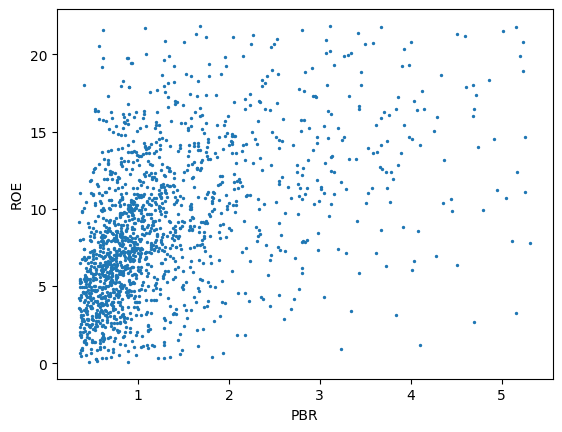

In [84]:
import matplotlib.pyplot as plt
t = new_df_tmp[new_df_tmp["returnOnEquity"] > 0]
plt.scatter(t["priceToBook"], t["returnOnEquity"]*100, s = 2)
plt.xlabel("PBR")
plt.ylabel("ROE")

##

## TOPIX採用銘柄の内、PBRが1倍未満の企業のROE

<li>ただしROEが負の企業は除外

<table>
  <tr><th></th><th>ROE</th><th>PBR</th></tr>
  <tr><th>PRB < 1</th><td>0.067494</td><td>0.691566</td></tr>
  <tr><th>ALL</th><td>0.087088</td><td>1.310660</td></tr>
</table>

In [85]:
pbr_u1 = t[t["priceToBook"] < 1]
pbr_u1.describe()

,returnOnEquity,priceToBook
count,852.000000,852.000000
mean,0.067494,0.691566
std,0.037843,0.176091
min,0.000820,0.355848
25%,0.040628,0.548061
50%,0.062170,0.697477
75%,0.085805,0.833287
max,0.215990,0.999443


In [86]:
t.describe()

,returnOnEquity,priceToBook
count,1647.000000,1647.000000
mean,0.087088,1.310660
std,0.047405,0.946748
min,0.000820,0.355848
25%,0.051800,0.690173
50%,0.080070,0.969469
75%,0.116225,1.585953
max,0.218360,5.316328
